In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

Generate data according to below equation of MA model: 



CodeCogsEqn.gif

Error or White noise: 
CodeCogsEqn (1).gif

In [2]:
errors = np.random.normal(0, 1, 400)

In [3]:
date_index = pd.date_range(start='1/1/2019', end='31/12/2019')

In [4]:
mu = 20
series = []
for t in range(1,len(date_index)+1):
    series.append(mu + 0.4*errors[t-1] + 0.3*errors[t-2] + errors[t])

In [5]:
len(series)

365

In [6]:
#print(series)

Code to insert point anomalies

In [7]:
pointAnomalies = [30, 90, 73, 44, 89, 201, 350 ] # index at which we want to insert point anomalies
# values of point anomalies
pointAnomaliesValues = np.random.normal(30, 2, 8)

print(pointAnomaliesValues)
for i in range(len(pointAnomalies)):
  series[pointAnomalies[i]] = pointAnomaliesValues[i]
  #print(series[i])



[29.3336241  31.52526437 30.69766853 26.78784571 27.25929777 28.94946903
 31.20278003 30.10045481]


In [8]:
for i in range(len(series)):
  if series[i] > 30:
    print(series[i])
    print(i)

30.697668533515014
73
31.52526436528373
90
31.202780029070848
350


In [9]:
series = pd.Series(series, date_index)
series = series.asfreq(pd.infer_freq(series.index))

**Code to insert Contextual Anomalies**

In [10]:
contextualAnomalies = [[58, 70],[170, 183],[283, 297]]

for i in range(len(contextualAnomalies)):
  anomalyRange = contextualAnomalies[i][1] - contextualAnomalies[i][0]
  pointAnomaliesValues = np.random.normal(10, 2, anomalyRange)
  for j in range(anomalyRange):
    series[contextualAnomalies[i][0]+j] = pointAnomaliesValues[j]





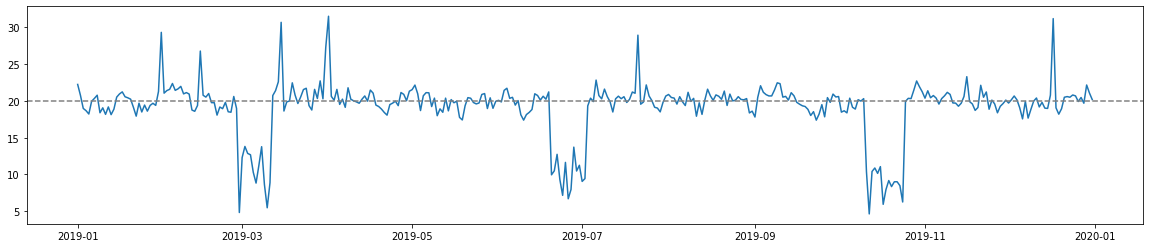

In [11]:
plt.figure(figsize=(20,4))
plt.plot(series)
plt.axhline(mu, linestyle='--', color='grey')

In [14]:
# convert series to dataframe
data = series.to_frame()

In [15]:
type(data)

pandas.core.frame.DataFrame